### Computational Guided Inquiry for PChem


# Visualizing Thermodynamic Surfaces


## Objective: Use Python graphics to visualize pressure as a state function


## Pre-class activities:  
Read the Introduction below.  

On your worksheet enter the following information:
1. Two equations for pressure as a function of temperature and volume: one for an ideal gas, and a second for van der Waals gas. 
2. The value of the gas constant (R) in the L-atm unit system. 
3. Define the terms _state function_, _equation of state_, _thermodynamic variable_, _thermodynamic surface_, _state space_, _isochore_, and _isotherm_.

Don't forget to bring your worksheet with you during the in-class activity.

## Introduction

An _equation of state_ is any algebraic expression that relates
thermodynamic variables to one another. You’re probably familiar with the
equation of state for an ideal gas, written algebraically as $PV=nRT$.
Here, the pressure, volume, and temperature are thermodynamic variables; _n_
tells you how much of the gas there is, and _R_ is the gas constant. It’s
clear from this equation that once we know any two thermodynamic
variables, we can get the third, e.g.,

<p style='text-align: right;'>
$ P(V,T) = \dfrac{n R T}{V} (ideal \space gas)$
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad  (1) $
</p>

We haven’t changed much in writing this; it’s still the equation of state for an ideal gas. But by writing _P(V,T)_ on the left hand side, we are signaling that we’re thinking about pressure as a _state function_ (because it depends on _T_ and _V_). Variables _T_ and _V_, the independent variables in this equation, define a two-dimensional _state space_. Equation 1 can be thought of geometrically as a surface in two dimensions. Josiah Willard Gibbs called these _thermodynamic surfaces_. James Clerk Maxwell famously made three plaster models of a thermodynamic surface, and gave one as a present to Gibbs. A photo of one is shown in Fig. 1.



<p style='text-align: center;'>
<img src="http://upload.wikimedia.org/wikipedia/en/a/aa/Maxwell_thermodynamic_surface.png" height="300" width="300"/>

__Figure 1__. Thermodynamic surface of the energy of an idealized water-like substance constructed by James Clerk Maxwell as a gift to Josiah Willard Gibbs$^1$. 
</p>

The idea of thermodynamic surfaces is quite general. The plaster model Maxwell gave to Gibbs showed the energy (_U_) as a function of the volume and entropy (_V_ and _S_) of an idealized water-like substance, which we would write shorthand as _U(V,S)_. But an important point is that _all_ substances (real or idealized) are characterized by thermodynamic surfaces. 

Can you visualize what the thermodynamic surface _P(V,T)_ of a gas looks like? One approach is to imagine how pressure behaves as a function of each variable separately. That is exactly what early investigators did. Two 17th century British scientists, Boyle and Hooke, found that when the volume of a gas is changed isothermally (temperature held constant), the gas pressure goes as the inverse of the volume. A century and a half later, French chemist Gay-Lussac reported that when the temperature of a gas is changed isochorically (volume held constant), the pressure goes up in direct proportion to the temperature. These properties are also easily obtained from Eq. 1, by the way, but Gay-Lussac, Boyle, and Hooke didn’t have that advantage.

If you are still struggling with visualizing _P(V,T)_ even with these insights, don’t worry: that’s the sort of thing computers are good at, and what you’ll be asking Python to do for you in this computational lab.


Of course, Eq. 1 does not describe real gases exactly; under some physical conditions, it’s a pretty good approximation, but under other physical conditions, large deviations from the real behavior are seen. That’s unfortunate in one sense, because it means real gases can’t be described with the algebraic elegance of Eq. 1. On the other hand, it turns out that the way a real gas differs from ideal-gas behavior can reveal important information about the gas molecules! A formula derived by van der Waals$^2$, 

<p style='text-align: right;'>
$ P(V,T) = \dfrac{n R T}{V-nb} -\dfrac{an^2}{V^2} (van \space der \space Waals \space gas) $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad  (2) $
</p>


is a kind of compromise: it is not quite as elegant (or at least simple) as the ideal gas equation of state, but it has the great advantage that it describes real gases much better, because parameters _a_ and _b_ are adjusted for each gas.



If you’re interested in the error (difference) between these two ways of describing a gas, the formula is

<p style='text-align: right;'>
$ \%error = \dfrac{P_{ideal}-P_{vdw}}{P_{vdw}}x100 $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad  (3) $
</p>


This formula assumes the van der Waals result is more accurate, which is generally accepted to be the case.

In this computational lab, you will use Python to generate and manipulate thermodynamic surfaces for ideal gases and for van der Waals gases.

## References
(1) Willard Gibbs: American Genius (1942), by Muriel Rukeyser.  
(2) [Wikipedia's page on van der Waals constants](https://en.wikipedia.org/wiki/Van_der_Waals_constants_%28data_page%29)

## In-class activities  
You'll need to import various libraries for this.

In [1]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

Your next goal is to get Python to calculate the pressure of one mole of an ideal gas and of a van der Waals gas of your choice at T=300 K and V=25 L. Modify the cell below appropriately to do this. You’ll know you’ve done these calculations right if you get pressures just under 1 atm. 

In [3]:
# Constants related to an ideal gas
R = 0.082 # Liter-atm/mol-K
V = 25 # Liters
T = 300 # Kelvin
n = 1 # moles

# van der Waals constants
a = 2.00
b = 0.04

# Get pressure of an ideal gas
P = n*R*T/V
print("Pressure of ideal gas = ", P, "atm")

# Get pressure of a vdw gas
Pvdw = n*R*T/(V-n*b)-a*n**2/V**2
print("Pressure of vdw = ", Pvdw, "atm")

# Get percent error (using Eq. 3 in the handout)
Error = (P-Pvdw)/Pvdw*100
print("%Error = ", Error)

Pressure of ideal gas =  0.9840000000000001 atm
Pressure of vdw =  0.9823769230769231 atm
%Error =  0.16521936590217087


Next, you're going to generate some Boyle isotherms, P(V) for a given T. You'll need to specify the range of volumes you want to look at. Modify the code below so the volume ranges from 10 to 40 L. 

In [4]:
# Generate a range of volumes
V_array = linspace(10,40)
print("There are", shape(V_array), "points in V") # shape tells you the length of the array
print(V_array)


There are (50,) points in V
[10.         10.6122449  11.2244898  11.83673469 12.44897959 13.06122449
 13.67346939 14.28571429 14.89795918 15.51020408 16.12244898 16.73469388
 17.34693878 17.95918367 18.57142857 19.18367347 19.79591837 20.40816327
 21.02040816 21.63265306 22.24489796 22.85714286 23.46938776 24.08163265
 24.69387755 25.30612245 25.91836735 26.53061224 27.14285714 27.75510204
 28.36734694 28.97959184 29.59183673 30.20408163 30.81632653 31.42857143
 32.04081633 32.65306122 33.26530612 33.87755102 34.48979592 35.10204082
 35.71428571 36.32653061 36.93877551 37.55102041 38.16326531 38.7755102
 39.3877551  40.        ]


Your next goal is to calculate and graph the Boyle isotherm of an ideal gas at this temperature (300K), for this range of volumes. You don't have to enter new values for the temperature or moles, since those values will carry over from the previous cell.

There are (50,) points in P


<IPython.core.display.Javascript object>


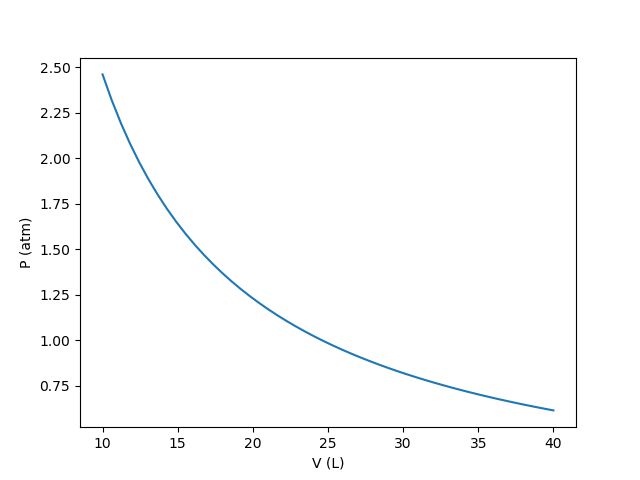

Text(0, 0.5, 'P (atm)')

In [5]:
# Get pressure of an ideal gas
P = n*R*T/V_array
print("There are", P.shape, "points in P")

# Open up a figure window
figure()

# Graph P(V)
plot(V_array,P) # Plot the ideal gas Boyle isotherm
xlabel('V (L)') # Label the x axis
ylabel('P (atm)') # Label the y axis

### Pause for Analysis #1: Sketch this graph on your worksheet

Now produce a Boyle isotherm of a van der Waals gas at the same temperature and range of volumes. Label your axes as before. 

<IPython.core.display.Javascript object>


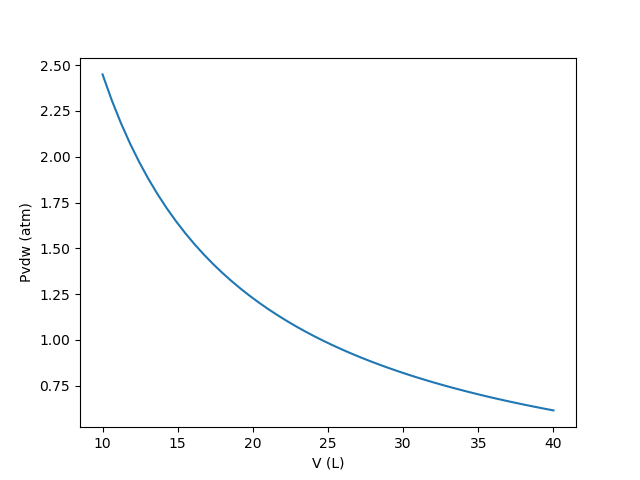

Text(0, 0.5, 'Pvdw (atm)')

In [6]:
# Get pressure of a vdw gas
Pvdw = n*R*T/(V_array-n*b)-a*n**2/V_array**2
# Open up a figure window
figure()
# Graph Pvdw(V)
plot(V_array,Pvdw) #Plot the van der Waals gas Boyle isotherm
xlabel('V (L)') #Label the x axis
ylabel ('Pvdw (atm)') #Label the y axis

You'll notice that these two graphs are pretty similar, but they're not identical. To explore this, print the %error in the pressure (like what you did in the 1st cell, but now you should see results for a range of volumes). 

In [7]:
# Get the %error
Error = ((P-Pvdw)/Pvdw*100)

# Print the %error
print ("%Error = ", Error)

%Error =  [0.41310121 0.38926404 0.36802768 0.34898851 0.33182231 0.31626566
 0.30210234 0.28915317 0.27726846 0.26632213 0.25620727 0.24683261
 0.23811976 0.23000105 0.22241768 0.21531842 0.20865833 0.20239789
 0.19650217 0.1909402  0.18568443 0.18071024 0.1759956  0.17152071
 0.16726773 0.16322056 0.15936461 0.15568664 0.15217461 0.14881754
 0.14560538 0.14252896 0.13957986 0.13675031 0.13403321 0.13142198
 0.12891054 0.1264933  0.12416503 0.12192093 0.1197565  0.11766758
 0.11565029 0.113701   0.11181633 0.10999312 0.10822842 0.10651944
 0.1048636  0.10325845]


### Pause for Analysis #2: Does the error get worse at high volume, or low volume? What is the physical cause of this trend? What is the mathematical cause?

Next, generate grids of volume and temperature (this defines the state space). Modify the code below so that the temperature ranges from 250 to 350 K, and the volume ranges from 10 to 40 L.

In [8]:
V_array = linspace(10,40)
T_array = linspace(250,350)
V_grid, T_grid = meshgrid(V_array,T_array) # Make a grid covering every V & T combination 
print("There are", shape(V_grid), "points in V")
print("There are", shape(T_grid), "points in T")

There are (50, 50) points in V
There are (50, 50) points in T


Now calculate and graph the thermodynamic surface $P(V,T)$ for an ideal gas

There are (50, 50) points in P


<IPython.core.display.Javascript object>


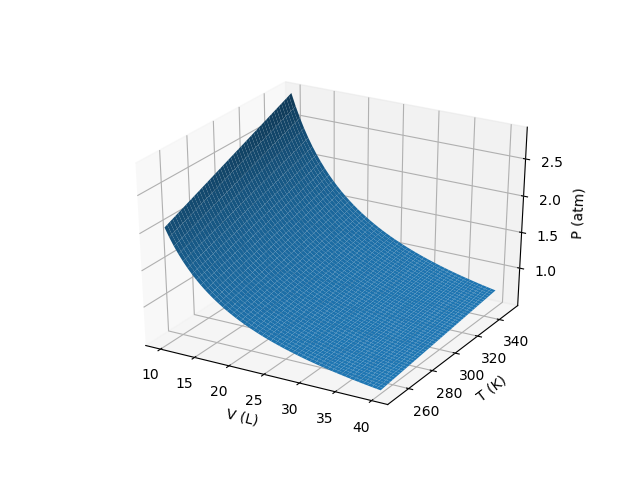

Text(0.5, 0, 'P (atm)')

In [9]:
# Get pressure grid of ideal gas for every point on the grid
P = n*R*T_grid/V_grid
print("There are", shape(P), "points in P")

# Open up a 3d figure window
ax = figure().gca(projection='3d') # Set up a three dimensional graphics window 

# Graph the pressure
ax.plot_surface(V_grid, T_grid, P) # Make the mesh plot P(V,T)
ax.set_xlabel('V (L)') # Label axes
ax.set_ylabel('T (K)')
ax.set_zlabel('P (atm)')

### Pause for Analysis #3: Make a sketch of your thermodynamic surface on worksheet, with appropriate annotation as to how the _Boyle-Hooke law_ and the _Gay-Lussac law_ are clearly in evidence. 

Next, do a similar thing (make a thermodynamic surface) for a van der Waals gas.

There are (50, 50) points in Pvdw


<IPython.core.display.Javascript object>


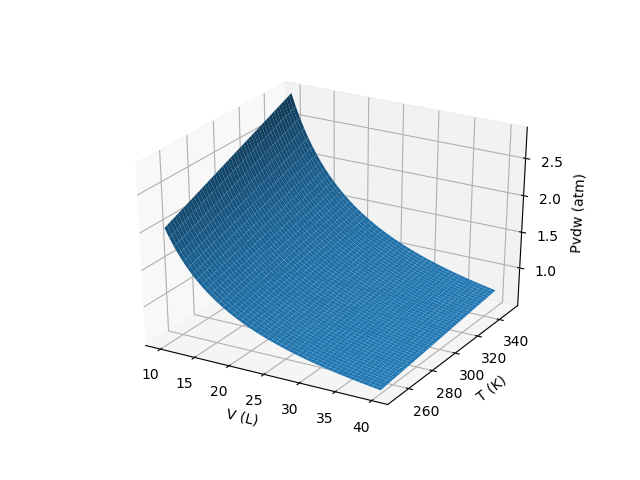

Text(0.5, 0, 'Pvdw (atm)')

In [10]:
# Get pressure grid of van der Waals gas (Pvdw) for every point on the grid
Pvdw = n*R*T_grid/(V_grid-n*b)-a*n**2/V_grid**2
print("There are", shape(Pvdw), "points in Pvdw")

# Open up a 3d figure window
ax = figure().gca(projection='3d') # Set up a three dimensional graphics window 

# Graph the pressure
ax.plot_surface(V_grid, T_grid, Pvdw) # Make the mesh plot Pvdw(V,T)
ax.set_xlabel('V (L)') # Label axes
ax.set_ylabel('T (K)')
ax.set_zlabel('Pvdw (atm)')

You’ll notice that the thermodynamic surfaces for an ideal gas and a vdw gas are barely distinguishable from each other. For that reason, it's useful to look at the % difference between them. 

<IPython.core.display.Javascript object>


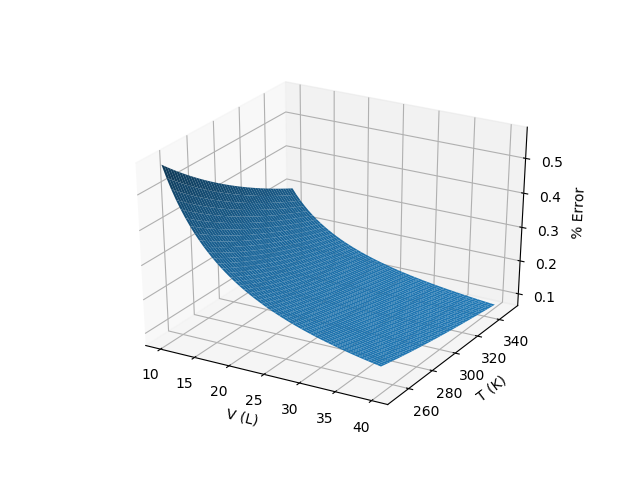

Text(0.5, 0, '% Error')

In [11]:
# Calculate the %error over the entire grid
Error = (P-Pvdw)/Pvdw*100

# Open up a 3d figure window
ax = figure().gca(projection='3d') # Set up a three dimensional graphics window 

# Graph the error
ax.plot_surface(V_grid, T_grid, Error) # Make the mesh plot Error(V,T)
ax.set_xlabel('V (L)') # Label axes
ax.set_ylabel('T (K)')
ax.set_zlabel('% Error')

### Pause for Analysis #4: Based on the graph of the error you just made, summarize any trends in the error with respect to increasing/decreasing volume and temperature.

## Post-class activities:   
On the worksheet, enter the following:

1. Your responses to the "pause for analysis" items.
2. In this activity, you've considered _mathematical_ as well as _physical_ origins of non-ideality of a real gas. Write a paragraph describing which form of thinking you prefer, and why (or some equivalent interesting paragraph). 
3. In this activity you've considered _graphical_ representations of state functions as well as _algebraic_ representations (like $P=nRT/V$). Write a paragraph describing which kind of representation you prefer (or some equivalent).  

I'll also be looking at your python notebook (the .ipynb file) on the google drive. I will be looking for evidence of your mastery of the computational methods embedded in the exercise: whether the notebook is complete and your results accurate.